In [1]:
# PART 1 - Importing Data from Big Query for World Bank
# Importing Percent of Adults Overweight by Country
# Importing Domestic General government Healthcare Expenditure

In [2]:

import pandas as pd

In [3]:
%load_ext google.cloud.bigquery
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=r"C:\Users\pa223\DAB-Rutgers-[].json"
#removed my personal JSON file info that connects to Big Query

In [4]:
client = bigquery.Client()

In [5]:
# Overweight data export (2016)

In [6]:
overweight_data = client.query(''' SELECT country_name, country_code, indicator_name, indicator_code, value, year
FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
WHERE 
indicator_code = 'SH.STA.OWAD.ZS' AND
year = 2016
ORDER BY country_name ''').to_dataframe()

overweight_data.head()

,country_name,country_code,indicator_name,indicator_code,value,year
0,Afghanistan,AFG,Prevalence of overweight (% of adults),SH.STA.OWAD.ZS,23.0,2016
1,Albania,ALB,Prevalence of overweight (% of adults),SH.STA.OWAD.ZS,57.7,2016
2,Algeria,DZA,Prevalence of overweight (% of adults),SH.STA.OWAD.ZS,62.0,2016
3,Andorra,AND,Prevalence of overweight (% of adults),SH.STA.OWAD.ZS,63.7,2016
4,Angola,AGO,Prevalence of overweight (% of adults),SH.STA.OWAD.ZS,27.5,2016


In [7]:
# Healthcare Expenditure data export (2015)

In [8]:
# Domestic General Health Expenditures (2015)
govt_healthcare_data = client.query(''' SELECT country_name, country_code, indicator_name, indicator_code, value,year
FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
WHERE 
indicator_code = 'SH.XPD.GHED.PC.CD' AND
year = 2015
ORDER BY country_name ''' ).to_dataframe()

govt_healthcare_data.head()

,country_name,country_code,indicator_name,indicator_code,value,year
0,Afghanistan,AFG,Domestic general government health expenditure...,SH.XPD.GHED.PC.CD,3.107937,2015
1,Albania,ALB,Domestic general government health expenditure...,SH.XPD.GHED.PC.CD,112.503053,2015
2,Algeria,DZA,Domestic general government health expenditure...,SH.XPD.GHED.PC.CD,205.831546,2015
3,Andorra,AND,Domestic general government health expenditure...,SH.XPD.GHED.PC.CD,2399.490665,2015
4,Angola,AGO,Domestic general government health expenditure...,SH.XPD.GHED.PC.CD,51.572588,2015


In [9]:
# check number of countries in Overweight Data Export

print(f'OVERWEIGHT EXPORT: How many countries are there?')
print('')
if len(overweight_data) < 195:
    print(f' There are missing countries in the Overweight export. Merge with country file.')
else:
    print(f'There are {len(overweight_data)} records for the Overweight export and there are 195 countries in the World')
    print(f'Merge with a list of all valid countries to identify why there are more records than countries')

print('')
print('')
# check for missing values
overweight_data.info()


OVERWEIGHT EXPORT: How many countries are there?

There are 229 records for the Overweight export and there are 195 countries in the World
Merge with a list of all valid countries to identify why there are more records than countries


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 6 columns):
country_name      229 non-null object
country_code      229 non-null object
indicator_name    229 non-null object
indicator_code    229 non-null object
value             229 non-null float64
year              229 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.8+ KB


In [10]:
# no longer require the year or indicator code
del overweight_data['year']
del overweight_data['indicator_code']

In [11]:
# Rename the Value field
# Overweight value
overweight_data.rename(columns={'value':'per_overweight_adults'},inplace=True)
                              
overweight_data.head(5)  


,country_name,country_code,indicator_name,per_overweight_adults
0,Afghanistan,AFG,Prevalence of overweight (% of adults),23.0
1,Albania,ALB,Prevalence of overweight (% of adults),57.7
2,Algeria,DZA,Prevalence of overweight (% of adults),62.0
3,Andorra,AND,Prevalence of overweight (% of adults),63.7
4,Angola,AGO,Prevalence of overweight (% of adults),27.5


In [12]:
#no longer need the indicator name
del overweight_data['indicator_name']

In [13]:
# check number of countries in Health Expenditure Export
print(f'HEALTHCARE EXPENDITURE EXPORT: How many countries are there?')
print('')
if len(govt_healthcare_data) < 195:
    print(f' There are missing countries in the Healthcare expenditure export. Merge with country file.')
else:
    print(f'There are {len(govt_healthcare_data)} records for the Healthcare export and there are 195 countries in the World')
    print(f'Merge with a list of all valid countries to identify why there are more records than countries')

print('')
print('')
# check for missing values
govt_healthcare_data.info()


HEALTHCARE EXPENDITURE EXPORT: How many countries are there?

There are 224 records for the Healthcare export and there are 195 countries in the World
Merge with a list of all valid countries to identify why there are more records than countries


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 6 columns):
country_name      224 non-null object
country_code      224 non-null object
indicator_name    224 non-null object
indicator_code    224 non-null object
value             224 non-null float64
year              224 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.6+ KB


In [14]:
# no longer require the year or indicator code
del govt_healthcare_data['year']
del govt_healthcare_data['indicator_code']

In [15]:
# Rename the Value field
# Healthcare_expenditure value
govt_healthcare_data.rename(columns={'value':'healthcare_govt_expenditure'},inplace=True)
                              
govt_healthcare_data.head()  


,country_name,country_code,indicator_name,healthcare_govt_expenditure
0,Afghanistan,AFG,Domestic general government health expenditure...,3.107937
1,Albania,ALB,Domestic general government health expenditure...,112.503053
2,Algeria,DZA,Domestic general government health expenditure...,205.831546
3,Andorra,AND,Domestic general government health expenditure...,2399.490665
4,Angola,AGO,Domestic general government health expenditure...,51.572588


In [16]:
#no longer need the indicator name
del govt_healthcare_data['indicator_name']

govt_healthcare_data.head()

,country_name,country_code,healthcare_govt_expenditure
0,Afghanistan,AFG,3.107937
1,Albania,ALB,112.503053
2,Algeria,DZA,205.831546
3,Andorra,AND,2399.490665
4,Angola,AGO,51.572588


In [17]:
# MERGE World Bank Files of Healthcare and Overweight Adults Data
#removing spaces in the columns - the data was not merging
govt_healthcare_data.country_name = govt_healthcare_data.country_name.str.strip()
overweight_data.country_name = overweight_data.country_name.str.strip()

govt_healthcare_data.sort_values(by='country_name', inplace=True)
overweight_data.sort_values(by='country_name', inplace=True)

df_worldbank = pd.merge(govt_healthcare_data, overweight_data, on='country_name', how='outer')

del df_worldbank['country_code_y']
del df_worldbank['country_code_x']
df_worldbank.head()


,country_name,healthcare_govt_expenditure,per_overweight_adults
0,Afghanistan,3.107937,23.0
1,Albania,112.503053,57.7
2,Algeria,205.831546,62.0
3,Andorra,2399.490665,63.7
4,Angola,51.572588,27.5


In [18]:
# Updating Percent_Overweight_Adults to decimal value
df_worldbank.per_overweight_adults = df_worldbank.per_overweight_adults / 100

df_worldbank.head()

,country_name,healthcare_govt_expenditure,per_overweight_adults
0,Afghanistan,3.107937,0.230
1,Albania,112.503053,0.577
2,Algeria,205.831546,0.620
3,Andorra,2399.490665,0.637
4,Angola,51.572588,0.275


In [19]:
df_worldbank.set_index('country_name', inplace=True)
df_worldbank.rename(index={'Yemen, Rep.' :'Yemen',
                            'Venezuela, RB' :'Venezuela',
                            'Russian Federation' : 'Russia',
                            'Trinidad and Tobago' : 'Trinidad & Tobago',
                            'Syrian Arab Republic': 'Syria',
                            'Korea, Rep.' : 'South Korea'
                            }, inplace=True)

df_worldbank.head()

,healthcare_govt_expenditure,per_overweight_adults
country_name,,
Afghanistan,3.107937,0.230
Albania,112.503053,0.577
Algeria,205.831546,0.620
Andorra,2399.490665,0.637
Angola,51.572588,0.275


In [20]:
# Grab the World Happiness Rankings on Wikipedia - 2018

In [21]:
import io
import requests
import pandas as pd
from zipfile import ZipFile

In [22]:
url = 'https://en.wikipedia.org/wiki/World_Happiness_Report'

In [23]:
dfs = pd.read_html(url)

dfs

[                                                   0
 0                                       Descriptions
 1  The 2016 World Happiness Report -Rome Addition...,
                                                    0
 0                                       Descriptions
 1  The 2015 World Happiness Report has eight chap...,
                                                    0
 0                                       Descriptions
 1  The 2013 World Happiness Report has eight chap...,
                                                    0
 0                                       Descriptions
 1  The 2012 World Happiness Report was issued at ...,
                 0                         1      2               3  \
 0    Overall Rank                   Country  Score  GDP per capita   
 1               1                   Finland  7.632           1.305   
 2               2                    Norway  7.594           1.456   
 3               3                   Denmark  7.555           1.

In [24]:
from bs4 import BeautifulSoup

website_url = requests.get('https://en.wikipedia.org/wiki/World_Happiness_Report').text

soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   World Happiness Report - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"World_Happiness_Report","wgTitle":"World Happiness Report","wgCurRevisionId":883695566,"wgRevisionId":883695566,"wgArticleId":42576223,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Happiness indices","Sustainability metrics and indices"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","Februa

In [25]:
happiness_table = soup.find('table',{'class':'wikitable sortable'})

In [26]:
happiness_table

<table class="wikitable sortable">
<tbody><tr valign="top">
<th style="width: 10px;">Overall Rank
</th>
<th style="width: 250px;">Country
</th>
<th><abbr title="Happiness score">Score</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: GDP">GDP per capita</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Social support">Social support</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Healthy life expectancy">Healthy life expectancy</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Freedom to make life choices">Freedom to make life choices</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Generosity">Generosity</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Perceptions of corruption">Perceptions of corruption</abbr>
</th></tr>
<tr>
<td>1</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="1100" data-file-width="1800" decoding="async" height="14" src="//upload.wikimedi

In [27]:
# Start pulling each value to create the table

#Pull the field names
fields = happiness_table.find_all('th')

fields

field_names = []
for field in fields:
    
    x = (field.text)
    x = x[0:-1]
    #print(x)
    field_names.append(x.lower())

field_names


['overall rank',
 'country',
 'score',
 'gdp per capita',
 'social support',
 'healthy life expectancy',
 'freedom to make life choices',
 'generosity',
 'perceptions of corruption']

In [28]:
table_rows = happiness_table.find_all('tr')

table_rows
rows = []

# CLEANSE DATA
# Remove first row of empty string
# lower case each column name

count=0
for tr in table_rows:
    if count>=1:
        td = tr.find_all('td')
        row = [i.text for i in td]
        rows.append(row)
        print(row)
    else:
        count=count+1

['1', '\xa0Finland', '7.632', '1.305', '1.592', '0.874', '0.681', '0.192', '0.393\n']
['2', '\xa0Norway', '7.594', '1.456', '1.582', '0.861', '0.686', '0.286', '0.340\n']
['3', '\xa0Denmark', '7.555', '1.351', '1.590', '0.868', '0.683', '0.284', '0.408\n']
['4', '\xa0Iceland', '7.495', '1.343', '1.644', '0.914', '0.677', '0.353', '0.138\n']
['5', '\xa0\xa0Switzerland', '7.487', '1.420', '1.549', '0.927', '0.660', '0.256', '0.357\n']
['6', '\xa0Netherlands', '7.441', '1.361', '1.488', '0.878', '0.638', '0.333', '0.295\n']
['7', '\xa0Canada', '7.328', '1.330', '1.532', '0.896', '0.653', '0.321', '0.291\n']
['8', '\xa0New Zealand', '7.324', '1.268', '1.601', '0.876', '0.669', '0.365', '0.389\n']
['9', '\xa0Sweden', '7.314', '1.355', '1.501', '0.913', '0.659', '0.285', '0.383\n']
['10', '\xa0Australia', '7.272', '1.340', '1.573', '0.910', '0.647', '0.361', '0.302\n']
['11', '\xa0Israel', '7.190', '1.244', '1.433', '0.888', '0.464', '0.262', '0.082\n']
['12', '\xa0Austria', '7.139', '1.341'

In [29]:
rows
df_wiki = pd.DataFrame(rows, columns = field_names)
df_wiki.head()

,overall rank,country,score,gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393\n
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340\n
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408\n
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138\n
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357\n


In [30]:
# remove the \n from last column
df_wiki['perceptions of corruption'] = df_wiki['perceptions of corruption'].str.replace(r'\n','')

df_wiki.head()

,overall rank,country,score,gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [31]:
# Fill a string 'N/A' to '0' in order to convert to a number
df_wiki['perceptions of corruption']=df_wiki['perceptions of corruption'].str.replace('N/A','0')

In [32]:
# Convert all text fields to numeric
df_wiki['overall rank'] = df_wiki['overall rank'].astype(int)
df_wiki['score'] = df_wiki['score'].astype(float)
df_wiki['gdp per capita'] = df_wiki['gdp per capita'].astype(float)
df_wiki['healthy life expectancy'] = df_wiki['healthy life expectancy'].astype(float)
df_wiki['freedom to make life choices'] = df_wiki['freedom to make life choices'].astype(float)
df_wiki['generosity'] = df_wiki['generosity'].astype(float)
df_wiki['social support'] = df_wiki['social support'].astype(float)
df_wiki['perceptions of corruption'] = df_wiki['perceptions of corruption'].astype(float)

In [33]:
# rename the country field in df_wiki to country_name
df_wiki.rename(columns={"country" : "country_name"}, inplace=True)
df_wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
overall rank                    156 non-null int32
country_name                    156 non-null object
score                           156 non-null float64
gdp per capita                  156 non-null float64
social support                  156 non-null float64
healthy life expectancy         156 non-null float64
freedom to make life choices    156 non-null float64
generosity                      156 non-null float64
perceptions of corruption       156 non-null float64
dtypes: float64(7), int32(1), object(1)
memory usage: 10.4+ KB


In [34]:
# Replace spaces with underlines
df_wiki.columns = df_wiki.columns.str.replace('\s+', '_')
df_wiki.head()

,overall_rank,country_name,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [35]:
# Sort the tables
df_wiki.sort_values(by='country_name')
df_worldbank.sort_values(by='country_name')

df_worldbank.reset_index(inplace=True)
df_worldbank.head()

,country_name,healthcare_govt_expenditure,per_overweight_adults
0,Afghanistan,3.107937,0.230
1,Albania,112.503053,0.577
2,Algeria,205.831546,0.620
3,Andorra,2399.490665,0.637
4,Angola,51.572588,0.275


In [36]:
df_wiki.head()

,overall_rank,country_name,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [37]:
# WIKI file did not sort, setting index to sort by country
df_wiki.set_index('country_name', inplace=True)

df_wiki.sort_index(inplace=True)

In [38]:
df_wiki.reset_index(inplace=True)
df_wiki.head()

,country_name,overall_rank,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Afghanistan,145,3.632,0.332,0.537,0.255,0.085,0.191,0.036
1,Albania,112,4.586,0.916,0.817,0.790,0.419,0.149,0.032
2,Algeria,84,5.295,0.979,1.154,0.687,0.077,0.055,0.135
3,Angola,142,3.795,0.730,1.125,0.269,0.000,0.079,0.061
4,Argentina,29,6.388,1.073,1.468,0.744,0.570,0.062,0.054


In [39]:
#removing spaces front and end of the columns
df_worldbank.columns = df_worldbank.columns.str.strip()
df_wiki.columns      = df_wiki.columns.str.strip()

#removing spaces in the columns - the data was not merging
df_worldbank.country_name = df_worldbank.country_name.str.strip()
df_wiki.country_name = df_wiki.country_name.str.strip()

data_merge = pd.merge(df_wiki,df_worldbank, on='country_name', how='outer')

# Ensure the overall rank stays as an integer
#data_merge['overall_rank'] = data_merge['overall_rank'].astype(int)

In [40]:
#check which countries did not merge
nans = lambda data_merge: data_merge[data_merge.isnull().any(axis=1)]

In [41]:
# Missing value data records
# LOOKING ONLY AT RECORDS WITH ANY MISSING VALUES TO EVALUATE MANUALLY ANY OPPORTUNITY TO ADJUST NAMES AND QA DATA IS ACCURATE
nans(data_merge)



,country_name,overall_rank,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,healthcare_govt_expenditure,per_overweight_adults
6,Australia,10.0,7.272,1.340,1.573,0.910,0.647,0.361,0.302,NaN,0.645000
31,Congo (Brazzaville),114.0,4.559,0.682,0.811,0.343,0.514,0.091,0.077,NaN,NaN
32,Congo (Kinshasa),132.0,4.245,0.069,1.136,0.204,0.312,0.197,0.052,NaN,NaN
40,Egypt,122.0,4.419,0.885,1.025,0.553,0.312,0.092,0.107,NaN,NaN
55,Hong Kong,76.0,5.430,1.405,1.290,1.030,0.524,0.246,0.291,NaN,NaN
60,Iran,106.0,4.707,1.059,0.771,0.691,0.459,0.282,0.129,NaN,NaN
63,Israel,11.0,7.190,1.244,1.433,0.888,0.464,0.262,0.082,NaN,0.643000
65,Ivory Coast,107.0,4.671,0.541,0.872,0.080,0.467,0.146,0.103,NaN,NaN
67,Japan,54.0,5.915,1.294,1.462,0.988,0.553,0.079,0.150,NaN,0.272000
71,Kosovo,66.0,5.662,0.855,1.230,0.578,0.448,0.274,0.023,NaN,NaN


In [42]:
# Extracting only the Happiest Countries in the World to evaluate
#country names that could be identified as mis-matched were renamed
final= data_merge[data_merge['overall_rank'].notnull()]
final['overall_rank'] = final['overall_rank'].astype(int)

final

C:\Users\pa223\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,country_name,overall_rank,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,healthcare_govt_expenditure,per_overweight_adults
0,Afghanistan,145,3.632,0.332,0.537,0.255,0.085,0.191,0.036,3.107937,0.230
1,Albania,112,4.586,0.916,0.817,0.790,0.419,0.149,0.032,112.503053,0.577
2,Algeria,84,5.295,0.979,1.154,0.687,0.077,0.055,0.135,205.831546,0.620
3,Angola,142,3.795,0.730,1.125,0.269,0.000,0.079,0.061,51.572588,0.275
4,Argentina,29,6.388,1.073,1.468,0.744,0.570,0.062,0.054,712.691953,0.627
5,Armenia,129,4.321,0.816,0.990,0.666,0.260,0.077,0.028,58.256301,0.544
6,Australia,10,7.272,1.340,1.573,0.910,0.647,0.361,0.302,NaN,0.645
7,Austria,12,7.139,1.341,1.504,0.891,0.617,0.242,0.224,3428.551532,0.543
8,Azerbaijan,87,5.201,1.024,1.161,0.603,0.430,0.031,0.176,74.494599,0.536
9,Bahrain,43,6.105,1.338,1.366,0.698,0.594,0.243,0.123,787.748388,0.658


In [43]:
final
final.to_csv('World_Bank_and_Wiki_Happiest_Countries.csv', index=False)

In [44]:
# Data Fields within File
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 11 columns):
country_name                    156 non-null object
overall_rank                    156 non-null int32
score                           156 non-null float64
gdp_per_capita                  156 non-null float64
social_support                  156 non-null float64
healthy_life_expectancy         156 non-null float64
freedom_to_make_life_choices    156 non-null float64
generosity                      156 non-null float64
perceptions_of_corruption       156 non-null float64
healthcare_govt_expenditure     135 non-null float64
per_overweight_adults           140 non-null float64
dtypes: float64(9), int32(1), object(1)
memory usage: 14.0+ KB


In [45]:
final.describe()

,overall_rank,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,healthcare_govt_expenditure,per_overweight_adults
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,135.000000,140.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.180942,0.111282,760.511980,0.479493
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098460,0.096597,1378.762946,0.160121
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.124484,0.183000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.050750,22.057021,0.293500
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000,181.797069,0.555500
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.136500,687.816140,0.596750
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000,6943.922879,0.734000


## Extraneous Data Analyses and QA

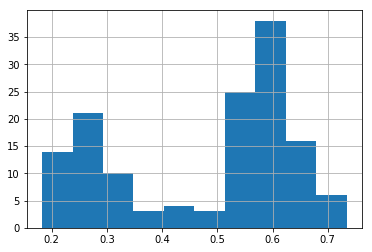

In [56]:
# Histogram of % Overweight Adult Values
final['per_overweight_adults'].hist()


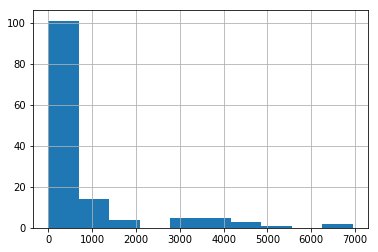

In [47]:
# Histogram of Healthcare Govt Expenditure Values
final['healthcare_govt_expenditure'].hist()

In [48]:
#Overall General Correlation Analyses
final.corr()

,overall_rank,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,healthcare_govt_expenditure,per_overweight_adults
overall_rank,1.000000,-0.991749,-0.804466,-0.737500,-0.777837,-0.530786,-0.102489,-0.357827,-0.652007,-0.640040
score,-0.991749,1.000000,0.800976,0.745760,0.775122,0.544280,0.134519,0.392151,0.687064,0.620204
gdp_per_capita,-0.804466,0.800976,1.000000,0.671733,0.844273,0.321775,-0.014150,0.276763,0.609522,0.706655
social_support,-0.737500,0.745760,0.671733,1.000000,0.667079,0.411087,0.017407,0.226757,0.473447,0.518252
healthy_life_expectancy,-0.777837,0.775122,0.844273,0.667079,1.000000,0.349144,0.018685,0.306778,0.573299,0.658403
freedom_to_make_life_choices,-0.530786,0.544280,0.321775,0.411087,0.349144,1.000000,0.297106,0.466651,0.401594,0.066836
generosity,-0.102489,0.134519,-0.014150,0.017407,0.018685,0.297106,1.000000,0.358430,0.275671,-0.197037
perceptions_of_corruption,-0.357827,0.392151,0.276763,0.226757,0.306778,0.466651,0.358430,1.000000,0.660891,0.101354
healthcare_govt_expenditure,-0.652007,0.687064,0.609522,0.473447,0.573299,0.401594,0.275671,0.660891,1.000000,0.380200
per_overweight_adults,-0.640040,0.620204,0.706655,0.518252,0.658403,0.066836,-0.197037,0.101354,0.380200,1.000000


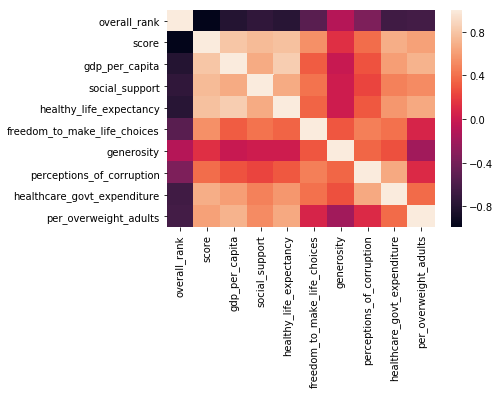

In [55]:
#Graphed the Correlations of each Variable against each other
import seaborn as sns
import pandas as pd

sns.heatmap(final.corr())

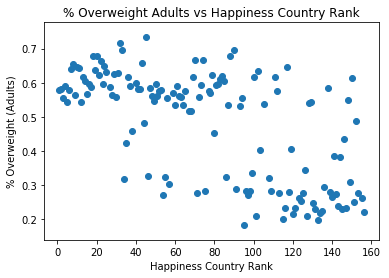

In [69]:
#Scatter plot of the Overweight % and Happiness Country Rank
from matplotlib import pyplot as plt
import numpy as np

                     
plt.scatter(final['overall_rank'],final['per_overweight_adults'])
plt.xlabel("Happiness Country Rank")
plt.ylabel("% Overweight (Adults)")
plt.title("% Overweight Adults vs Happiness Country Rank")

plt.show()
